In [1]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
from sklearn import linear_model
from matplotlib import pyplot as plt
import seaborn as sns

## Product relationships and propensity to purchase

The questions to answer with this data are:
- What product category leads to the highest spend on the return purchases?
- What product category leads to the fastest return to purchase?
- What are the chances that they return to purchase the same item?
- If a customer purchases X product category first, what are they likely to buy next and when?
- If a customer doesn’t repurchase again within ‘X’ amount of time, they are unlikely to purchase again for X (by product category)


In [2]:
d = pd.read_excel("productRelationships.xlsx", sheet_name = 'Data')
d = d.drop(columns = "Client_Id")
d.rename(columns = {'Repurchase_Period':'period','First_Product_Category':'first','Subsequent_Product_Category':'subs','Subsequent_Items_Ordered':'subsqty','Subsequent_Net_Value_before_Returns':'subsnet'},inplace=True)
d.head()

,period,first,subs,subsqty,subsnet
0,00 - 06 Month,ACC BAG,ACC BOTTLE,3,22.38
1,00 - 06 Month,ACC BAG,ACC NOISE MAKER,1,9.13
2,00 - 06 Month,ACC BASKET,SCOOTER ELECTRIC,1,416.63
3,00 - 06 Month,ACC BELL,SPARES CLAMPS,2,14.92
4,00 - 06 Month,ACC BELL,SPARES WHEELS,13,161.61


In [3]:
acc = d['first'].str.contains('ACC') & d['subs'].str.contains('ACC')

In [4]:
d.loc[acc].describe()

,subsqty,subsnet
count,1940.000000,1940.000000
mean,23.859794,283.257170
std,118.000939,1837.944098
min,1.000000,0.080000
25%,1.000000,10.545000
50%,3.000000,24.870000
75%,8.000000,78.402500
max,2576.000000,50927.000000


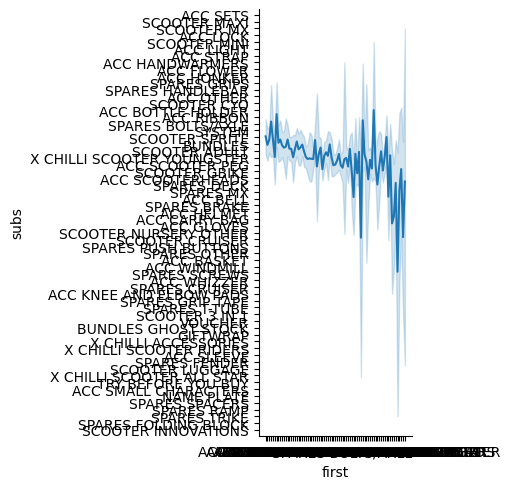

In [5]:
sns.relplot(data=d[['first','subs']], kind="line",
    x="first", y="subs")

So the table above shows that when you purchase products begining with 'ACC' and the subsequent products are 'ACC' also, the following values are shown

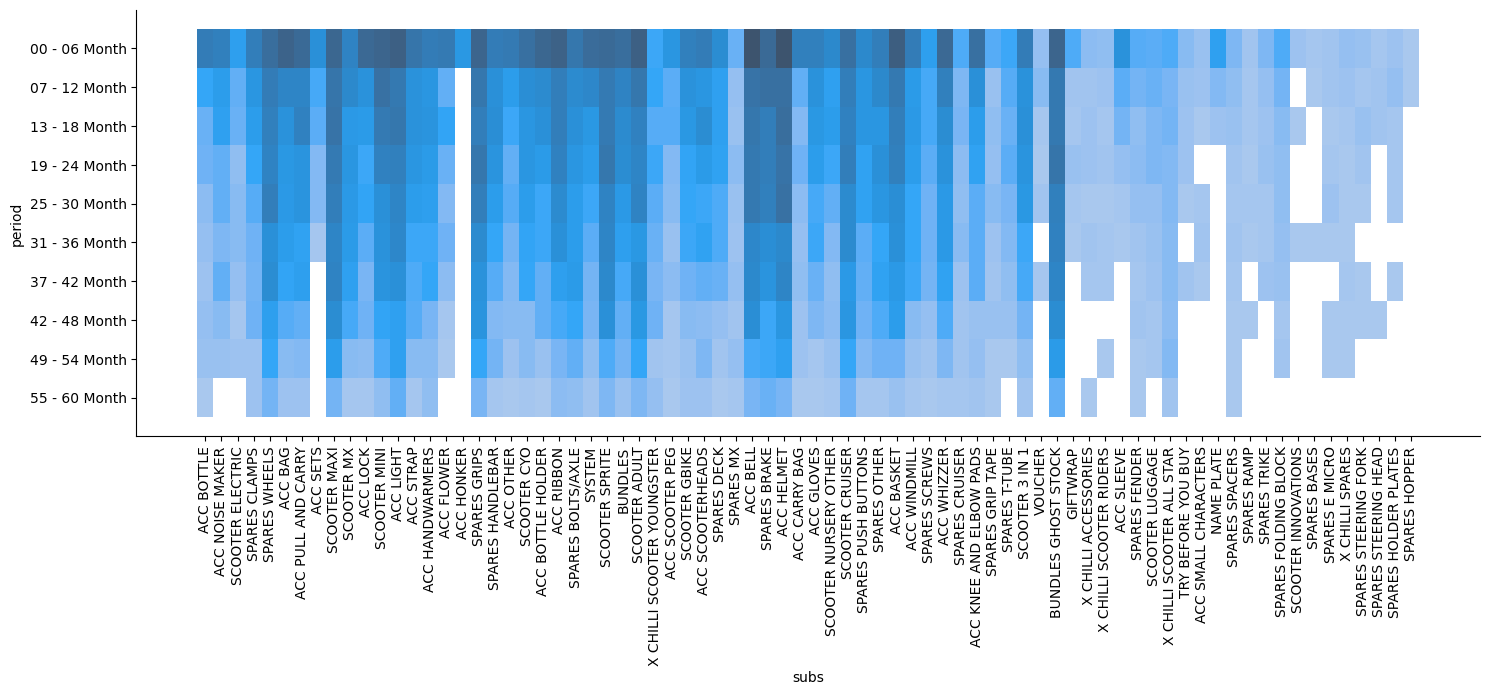

In [14]:
sns.displot(data=d, x="subs",y = 'period',aspect = 3, legend ='qty')
plt.tick_params(axis='x', rotation=90)
plt.savefig('histogram')

In [7]:
d.describe()

,subsqty,subsnet
count,13097.000000,13097.000000
mean,35.187982,956.059792
std,279.900969,7589.753437
min,1.000000,0.010000
25%,1.000000,16.670000
50%,3.000000,74.960000
75%,12.000000,292.380000
max,17393.000000,474337.400000


In [8]:
# reading headers
d.columns

Index(['period', 'first', 'subs', 'subsqty', 'subsnet'], dtype='object')

In [9]:
#read each column 
d[['subs','subsqty']]

,subs,subsqty
0,ACC BOTTLE,3
1,ACC NOISE MAKER,1
2,SCOOTER ELECTRIC,1
3,SPARES CLAMPS,2
4,SPARES WHEELS,13
...,...,...
13092,ACC WINDMILL,1
13093,SCOOTER ADULT,4
13094,SCOOTER MAXI,1
13095,SCOOTER ADULT,1


In [10]:
#reading a specific row
d.iloc[1]

period       00 - 06 Month
first              ACC BAG
subs       ACC NOISE MAKER
subsqty                  1
subsnet               9.13
Name: 1, dtype: object

In [11]:
d.loc[d['Subsequent_Product_Category'] == "ACC BOTTLE HOLDER"]

KeyError: 'Subsequent_Product_Category'

In [ ]:
d2 = pd.read_excel('productRelationships.xlsx', sheet_name='Sheet1')
d2.head()

In [ ]:

corr = d2.corr()
plt.figure(figsize=(20, 20))
plt.title("heatmap of 0-6 months correlation between first and subsequent purhcases")
sns.heatmap(corr, vmax=0.5, center=0,
            square=True, linewidths=2, cmap='Blues')
plt.savefig("heatmap.png")

### Lets try and categorise the table as this still doesn't show us much



d3 = d2.loc.groupby(d2['First Product Category'].str([0:3]))

d4 = d2.groupby(d2['First Product Category'], d2['First Product Category'].str([0:3]))
